# Importing libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from joblib import dump, load

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploring the dataset

In [44]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [45]:
df.shape

(200, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
df.duplicated().sum()

0

In [48]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

# Data Visualization

#### pairwise relationships between features

<Figure size 1152x720 with 0 Axes>

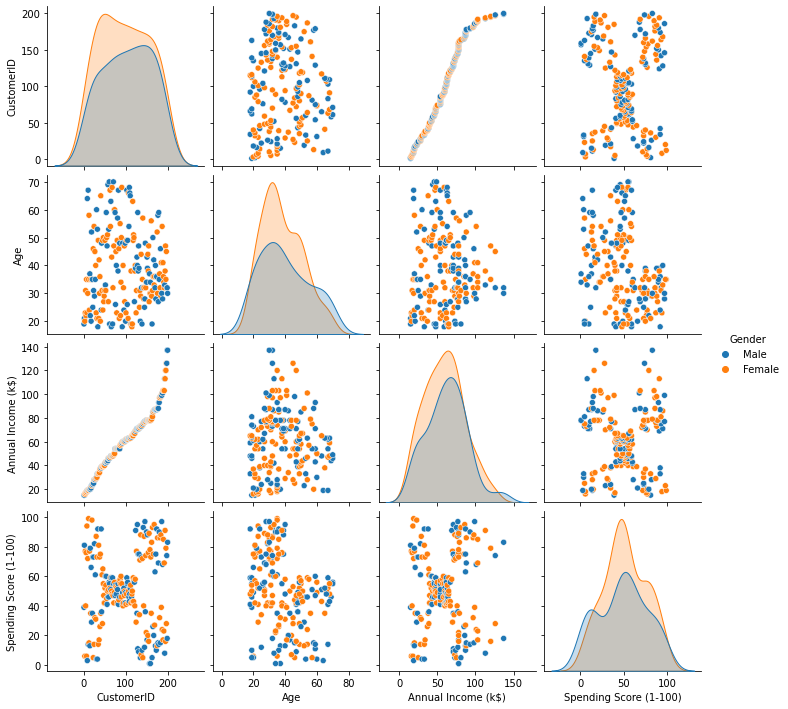

In [49]:
plt.figure(figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

#### male vs female

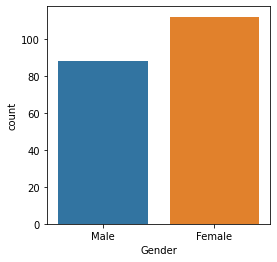

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Gender')
plt.show()

#### Distribution of numerical features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22624\3886204050.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22624\3886204050.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22624\3886204050.py:7: UserWarning:



`distplot`

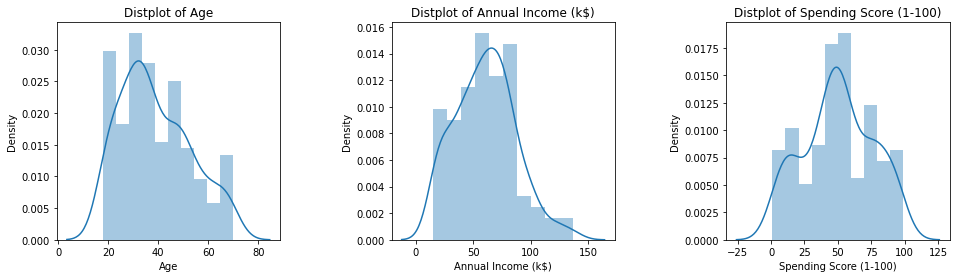

In [51]:
plt.figure(figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

# K Means Clustering

In [52]:
X = df.iloc[:, -3:]
X.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [53]:
km_inertias, km_scores = [], []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X)
    print(f'{i} clusters: {kmeans.inertia_}')
    km_inertias.append(kmeans.inertia_)
    km_scores.append(silhouette_score(X, kmeans.labels_))

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default val

2 clusters: 212840.1698209719
3 clusters: 143342.751571706
4 clusters: 104366.15145556198
5 clusters: 75350.77917248776
6 clusters: 58300.44332159069
7 clusters: 51084.505954934364
8 clusters: 44344.94980177717
9 clusters: 40953.73845841784
10 clusters: 37602.692961061926


c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
px.line(y=km_inertias,x=range(2,11),title='inertia depending on k')

In [55]:
px.line(y=km_scores,x=range(2,11),title='scores depending on k')

In [56]:
kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
df['group'] = kmeans.predict(X)

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [57]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     group  
0        0  
1        4  
2        0  
3        4  
4        0  
..     ...  
195      1  
196      3  
197      1  
198      3  
199      1  

[200 rows x 6 columns]

In [58]:
px.scatter_3d(df,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color='group',symbol='group')

In [59]:
df.group.value_counts()

2    79
1    39
3    36
0    23
4    23
Name: group, dtype: int64

In [60]:
for i in range(5):
    print(f'cluster nb : {i}')
    print(df[df.group == i].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count        23.0  23.000000           23.000000               23.000000
mean         23.0  45.217391           26.304348               20.913043
min           1.0  19.000000           15.000000                3.000000
max          45.0  67.000000           39.000000               40.000000



cluster nb : 1
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count        39.0  39.000000           39.000000               39.000000
mean        162.0  32.692308           86.538462               82.128205
min         124.0  27.000000           69.000000               63.000000
max         200.0  40.000000          137.000000               97.000000



cluster nb : 2
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
count   79.000000  79.000000           79.000000                79.00000
mean    86.265823  43.088608           55.291139                49.56962


# Saving model

In [61]:
dump(kmeans,'static\model.pk')

['static\\model.pk']

In [62]:
load_model = load('static\model.pk')

In [63]:
x=np.array([20,112,50]).reshape(1,-1)

In [64]:
p=load_model.predict(x)[0]
p

c:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



1

## Groups

* Cluster 0 :
  - Age : 45, older
  - low annual income
  - low annual spend
* Cluster 1 :
  - Age : 32, young
  - high annual income
  - high annual spend
* Cluster 2 :
  - Age : 43, older
  - medium annual income
  - medium annual spend
* Cluster 3 :
  - Age : 40, middle
  - high annual income
  - low annual spend
* Cluster 4 :
  - Age : 25, young
  - low annual income
  - high annual spend